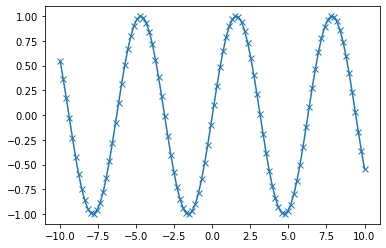

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker="x")

In [2]:
import pandas as pd
data = {'Name': ["John", "Anna", "Peter", "Linda"],
 'Location' : ["New York", "Paris", "Berlin", "London"],
 'Age' : [24, 13, 53, 33]
 }

In [3]:
data_df = pd.DataFrame(data)

In [4]:
display(data_df)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


### MGLEARN
* This is a library of utility functions we wrote for this book, so
that we don’t clutter up our code listings with details of plotting and data loading.

In [5]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.2
matplotlib version: 3.5.1
NumPy version: 1.21.5
SciPy version: 1.7.3
IPython version: 8.2.0
scikit-learn version: 1.0.2


In [6]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))
print(type(iris_dataset))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
<class 'sklearn.utils.Bunch'>


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [8]:
X_train.shape, y_train.shape

((112, 4), (112,))

In [9]:
X_test.shape, y_test.shape

((38, 4), (38,))


## 1.Look at my data

In [10]:
iris_df = pd.DataFrame(iris_dataset, columns=iris_dataset.feature_names)


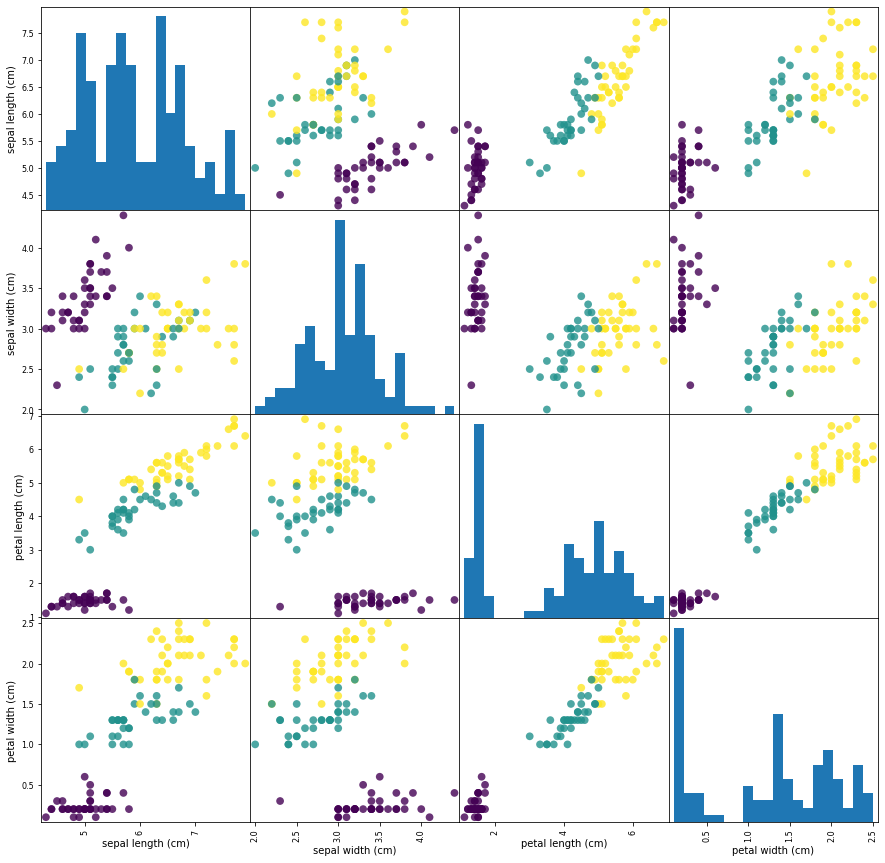

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix

# Load Iris dataset
iris_dataset = load_iris()

# Convert data to DataFrame
iris_df = pd.DataFrame(data=X_train, columns=iris_dataset.feature_names)

# Create a scatter matrix from the DataFrame
grr = scatter_matrix(iris_df, c=y_train, figsize=(15, 15), marker='o',
                     hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='viridis')

plt.show()


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new.shape:{X_new.shape}")

X_new.shape:(1, 4)


In [15]:
prediction = knn.predict(X_new)
print(f"prediction: {prediction}")
print(f"Predicted target name:{iris_dataset['target_names'][prediction]}")

prediction: [0]
Predicted target name:['setosa']


In [16]:
y_pred = knn.predict(X_test)
print(f"Test set predictions:{y_pred}")

Test set predictions:[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [17]:
np.mean(y_pred==y_test)

0.9736842105263158

In [18]:
print(f"Test set score: {knn.score(X_test,y_test)}")

Test set score: 0.9736842105263158


# CH2. Supervised Learning

* If a model is able to make accurate predictions on
unseen data, we say it is able to generalize from the training set to the test set.We
want to build a model that is able to generalize as accurately as possible

* Building a model that is too complex for the amount of
information we have, as our novice data scientist did, is called overfitting. Overfitting
occurs when you fit a model too closely to the particularities of the training set and
obtain a model that works well on the training set but is not able to generalize to new
data

* Choosing
too simple a model is called underfitting.

The trade-off between overfitting and underfitting is illustrated in 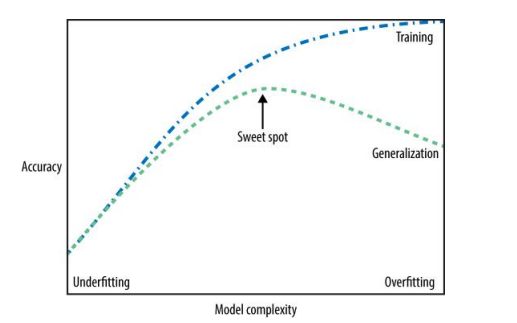

*Having more data and building appropriately more complex models can often work
wonders for supervised learning tasks*


In [19]:
!pip install mglearn
import mglearn
from sklearn.svm import SVC
X, y = mglearn.datasets.make_forge()


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


shape of x: (26, 2)


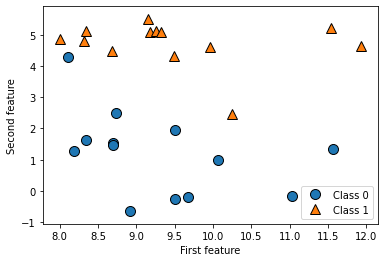

In [20]:
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0","Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print(f"shape of x: {X.shape}")

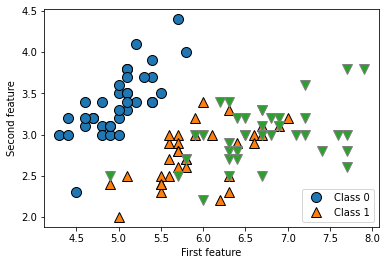

In [21]:
# Create and train an SVM classifier
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Plot data points
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# Plot decision boundary
coef = svm.coef_[0]
intercept = svm.intercept_[0]

# Plot the decision boundary as a line
x_values = np.linspace(4, 8, 10)
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, 'k--')

plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

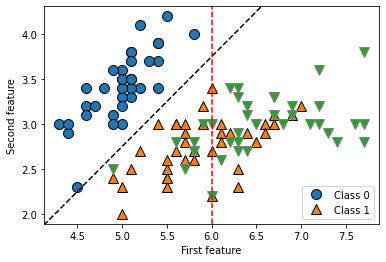

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn

# Load Iris dataset
iris_dataset = load_iris()
X, y = iris_dataset.data[:, :2], iris_dataset.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and train an SVM classifier
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

# Plot data points
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

# Plot decision boundary
coef = svm.coef_[0]
intercept = svm.intercept_[0]

# Plot the decision boundary as a line
x_values = np.linspace(4, 8, 10)
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, 'k--')

# Add line dividing the classes visually
plt.axvline(x=(x_values[0] + x_values[-1]) / 2, color='red', linestyle='--')

plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()


Text(0, 0.5, 'Target')

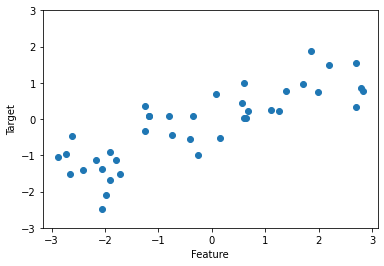

In [23]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

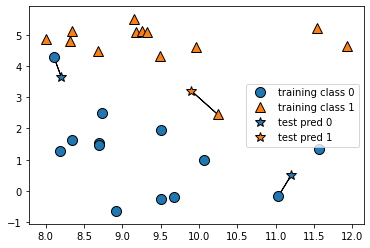

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=1)


## K-Nearest Neighbors
* To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

* the k-NN algorithm only considers exactly one nearest neigh‐
bor, which is the closest training data point to the point we want to make a prediction
for 

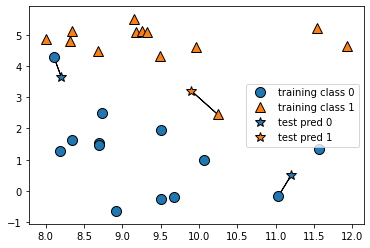

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

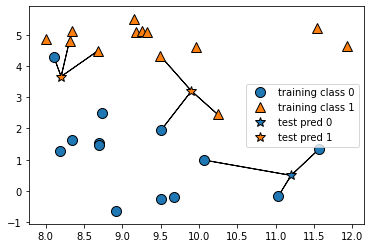

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

* While this illustration is for a binary classification problem, this method can be
applied to datasets with any number of classes. For more classes, we count how many
neighbors belong to each class and again predict the most common class

In [27]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [30]:
clf.fit(X_train,y_train)
print("Test set predictions: \n{}".format(clf.predict(X_test)))

Test set predictions: 
[1 0 1 0 1 0 0]


In [31]:
clf.score(X_test,y_test)

0.8571428571428571

### Analyzing KNeighborsClassifier
* For two-dimensional datasets, we can also illustrate the prediction for all possible test
points in the xy-plane. We color the plane according to the class that would be
assigned to a point in this region. This lets us view the decision boundary, which is the
divide between where the algorithm assigns class 0 versus where it assigns class 1.

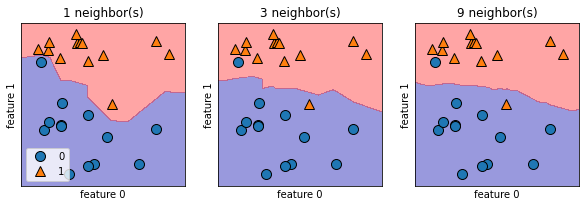

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

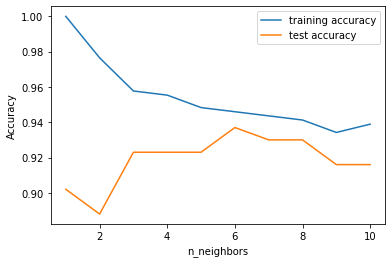

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


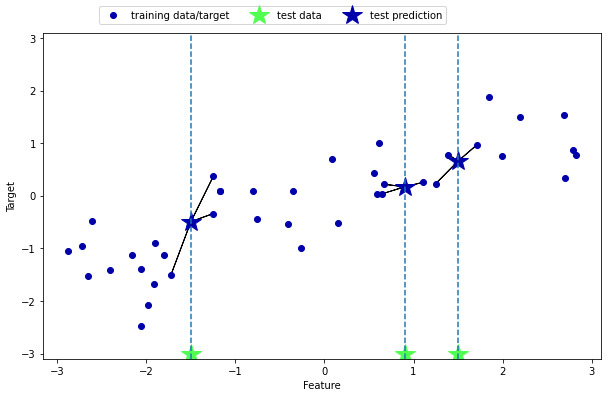

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [35]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Test set predictions: {}".format(reg.predict(X_test)))

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [36]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


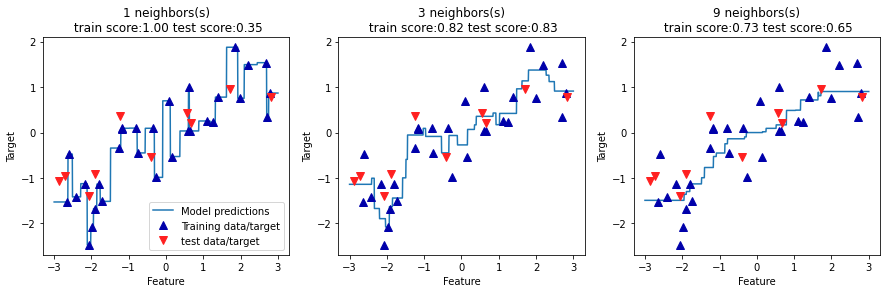

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train,'^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test,'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
    "{} neighbors(s)\n train score:{:.2f} test score:{:.2f}".format(
    n_neighbors, reg.score(X_train, y_train),
    reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
               "test data/target"], loc="best")

* As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.
### Linear models for regression

w[0]: 0.393906  b: -0.031804


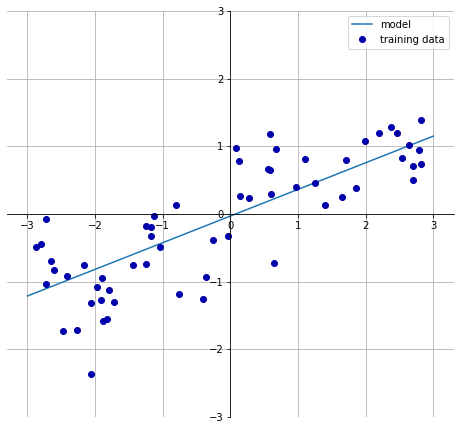

In [38]:
mglearn.plots.plot_linear_regression_wave()

In [39]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_test, X_train, y_test, y_train = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))


lr.coef_:[0.52553672]
lr.intercept_:-0.18179164353961566


In [40]:
print("training test score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

training test score: 0.72
Test set score: 0.55


In [41]:
X, y = mglearn.datasets.load_extended_boston()
X_test, X_train, y_test, y_train = train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.97
Test set score: -6.34


C:\Users\ebube\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

* This discrepancy between performance on the training set and the test set is a clear
sign of overfitting, and therefore we should try to find a model that allows us to con‐
trol complexity

In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))


Training set score: 0.82
Test set score: 0.76


* The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. 

In [43]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.68
Test set score: 0.62


In [44]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.83


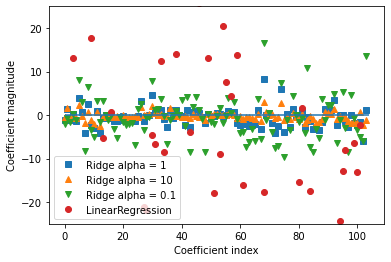

In [45]:
plt.plot(ridge.coef_, 's', label="Ridge alpha = 1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha = 10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha = 0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

C:\Users\ebube\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

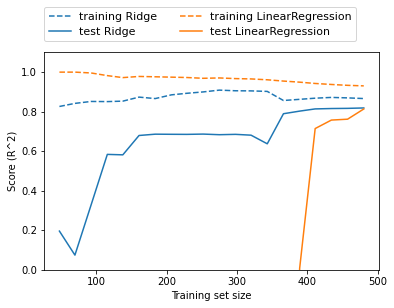

In [46]:
mglearn.plots.plot_ridge_n_samples()

### LOSSO

In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso.coef_ !=0)))

Training set score: 0.18
test set score: 0.09
Number of features used: 2.00


* As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero

In [48]:
lasso001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso001.coef_ !=0)))

Training set score: 0.96
test set score: 0.08
Number of features used: 84.00


C:\Users\ebube\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.632e+01, tolerance: 8.893e-01
  model = cd_fast.enet_coordinate_descent(


In [49]:
lasso1 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso1.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso1.score(X_test, y_test)))
print("Number of features used: {:.2f}".format(np.sum(lasso1.coef_ !=0)))

Training set score: 0.73
test set score: 0.72
Number of features used: 13.00


Text(0, 0.5, 'Coefficient magnitude')

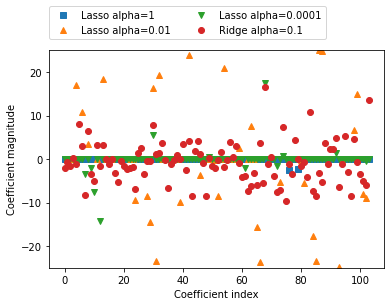

In [50]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso1.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

C:\Users\ebube\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


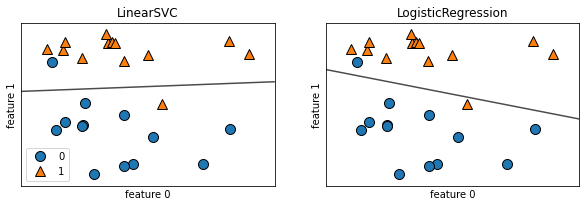

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

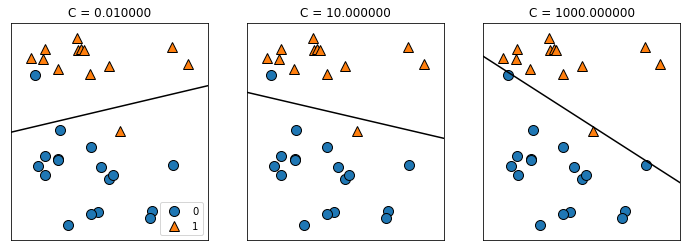

In [52]:
mglearn.plots.plot_linear_svc_regularization()

In [53]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.965


C:\Users\ebube\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
logreg1 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg1.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.958


C:\Users\ebube\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
logreg2 = LogisticRegression(C=0.001).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg2.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg2.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.944


C:\Users\ebube\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


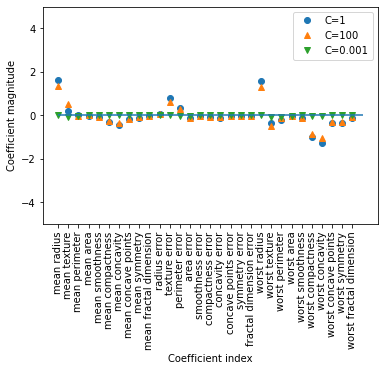

In [56]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg1.coef_.T, '^', label="C=100")
plt.plot(logreg2.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92


C:\Users\ebube\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


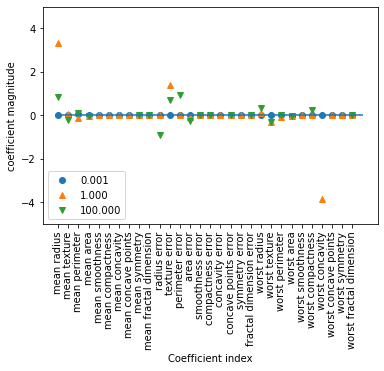

In [57]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver="liblinear").fit(X_train,y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T,marker,label="{:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("coefficient magnitude")
plt.ylim(-5,5)
plt.legend(loc=3)

* Coefficients learned by logistic regression with L1 penalty on the Breast
Cancer dataset for different values of C

- A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes.

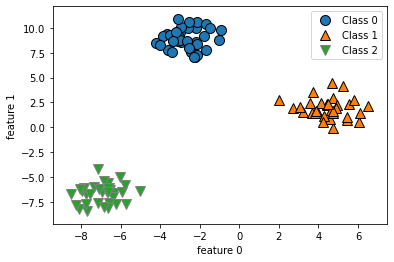

In [58]:
# one-vs.-rest method to a simple three-class classification dataset.
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [59]:
# we train a linearSVC classifier on the dataset
linear_svm = LinearSVC().fit(X,y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


* We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset). The intercept_
is now a one-dimensional array, storing the intercepts for each class.

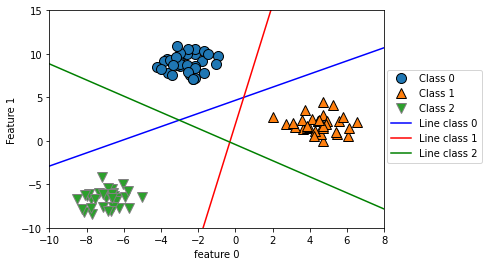

In [60]:
# let's visualize the lines given by the three binary classification
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line= np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b','r','g']):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'],loc=(1.01,0.3))

Text(0, 0.5, 'Feature 1')

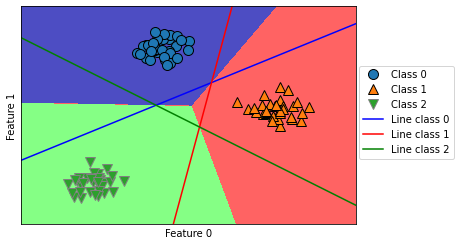

In [61]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 ['b', 'r', 'g']):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


In [62]:
X = np.array([[0, 1, 0, 1],
 [1, 0, 1, 1],
 [0, 0, 0, 1],
 [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [63]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print("Feature counts: \n{}".format(counts))

Feature counts: 
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### Decision Trees
* Decision trees are widely used models for classification and regression tasks. Essen‐
tially, they learn a hierarchy of if/else questions, leading to a decision.
* There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collaps‐
ing nodes that contain little information (also called post-pruning or just pruning).
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.

In [64]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [65]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [66]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

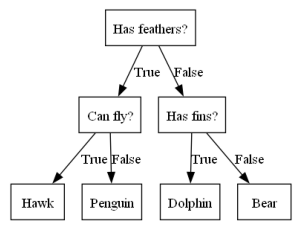

In [67]:
mglearn.plots.plot_animal_tree()

In [68]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


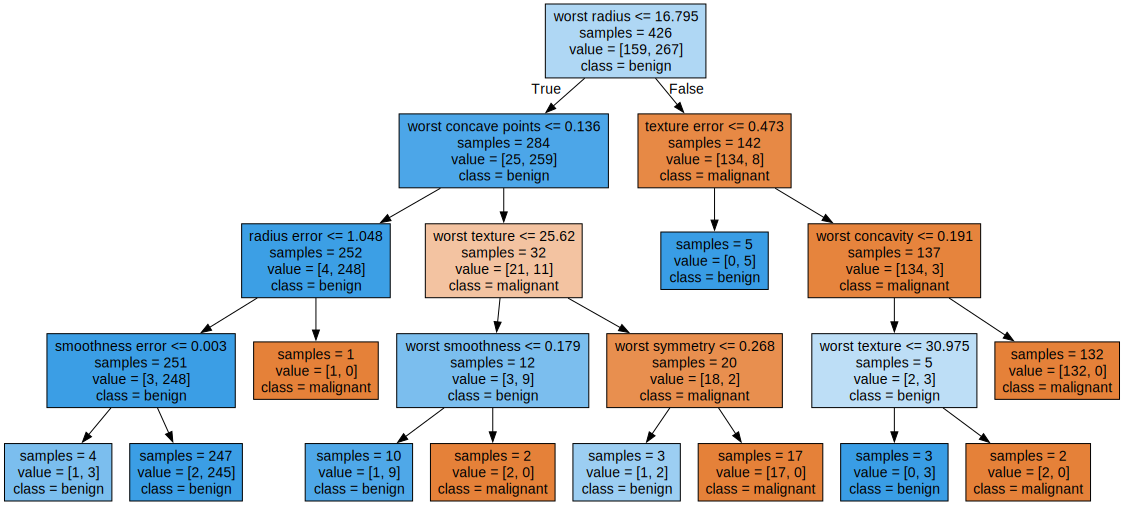

In [69]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [70]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


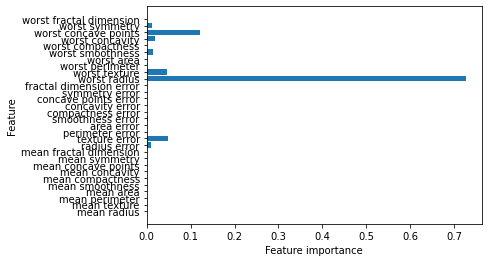

In [71]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

* Here we see that the feature used in the top split (“worst radius”) is by far the most
important feature.

Feature importances: [0. 1.]


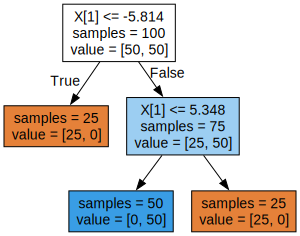

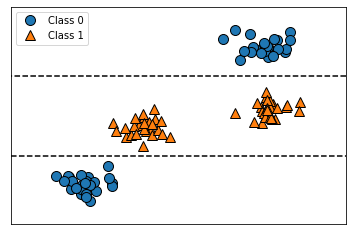

In [72]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

* The plot shows a dataset with two features and two classes. Here, all the information
is contained in X[1], and X[0] is not used at all. But the relation between X[1] and
the output class is not monotonous, meaning we cannot say “a high value of X[0]
means class 0, and a low value means class 1” (or vice versa).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


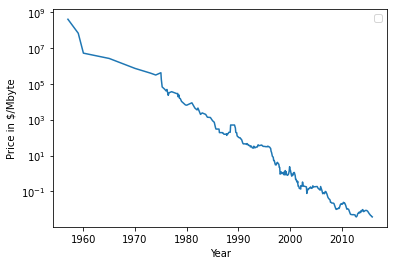

In [73]:
import pandas as pd
ram_price = pd.read_csv("ram_price.csv")
plt.semilogy(ram_price.date, ram_price.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.legend()

In [74]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_price[ram_price.date<2000]
data_test = ram_price[ram_price.date>=2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_price.date[:,np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree =np.exp(pred_tree)
price_lr =np.exp(pred_lr)

C:\Users\ebube\AppData\Local\Temp\ipykernel_5160\1956918139.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
C:\Users\ebube\AppData\Local\Temp\ipykernel_5160\1956918139.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_price.date[:,np.newaxis]


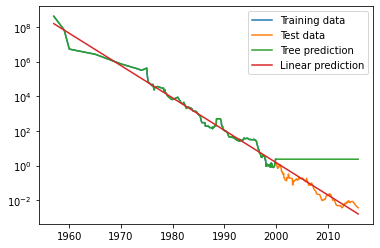

In [75]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_price.date, price_tree, label="Tree prediction")
plt.semilogy(ram_price.date, price_lr, label="Linear prediction")
plt.legend()


* Decision trees have two advantages over many of the algorithms we’ve discussed so
far: the resulting model can easily be visualized and understood by nonexperts (at
least for smaller trees), and the algorithms are completely invariant to scaling of the
data. As each feature is processed separately, and the possible splits of the data don’t
depend on scaling, no preprocessing like normalization or standardization of features
is needed for decision tree algorithms. In particular, decision trees work well when
you have features that are on completely different scales, or a mix of binary and con‐
tinuous features.

## Ensembles of Decision Trees
* Ensembles are methods that combine multiple machine learning models to create
more powerful models

## Random forests
* As we just observed, a main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. A random forest
is essentially a collection of decision trees, where each tree is slightly different from
the others. The idea behind random forests is that each tree might do a relatively
good job of predicting, but will likely overfit on part of the data.
### **Building random forests:**
 * To build a random forest model, you need to decide on the
number of trees to build (the n_estimators parameter of RandomForestRegressor or
RandomForestClassifier). Let’s say we want to build 10 trees. These trees will be
built completely independently from each other, and the algorithm will make differ‐
ent random choices for each tree to make sure the trees are distinct. To build a tree,
we first take what is called a bootstrap sample of our data. That is, from our n_samples
data points, we repeatedly draw an example randomly with replacement (meaning the
same sample can be picked multiple times), n_samples times. This will create a data‐
set that is as big as the original dataset, but some data points will be missing from it
(approximately one third), and some will be repeated.
    * a high max_fea
tures means that the trees in the random forest will be quite similar, and they will be
able to fit the data easily, using the most distinctive features. A low max_features
means that the trees in the random forest will be quite different, and that each tree
might need to be very deep in order to fit the data well

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

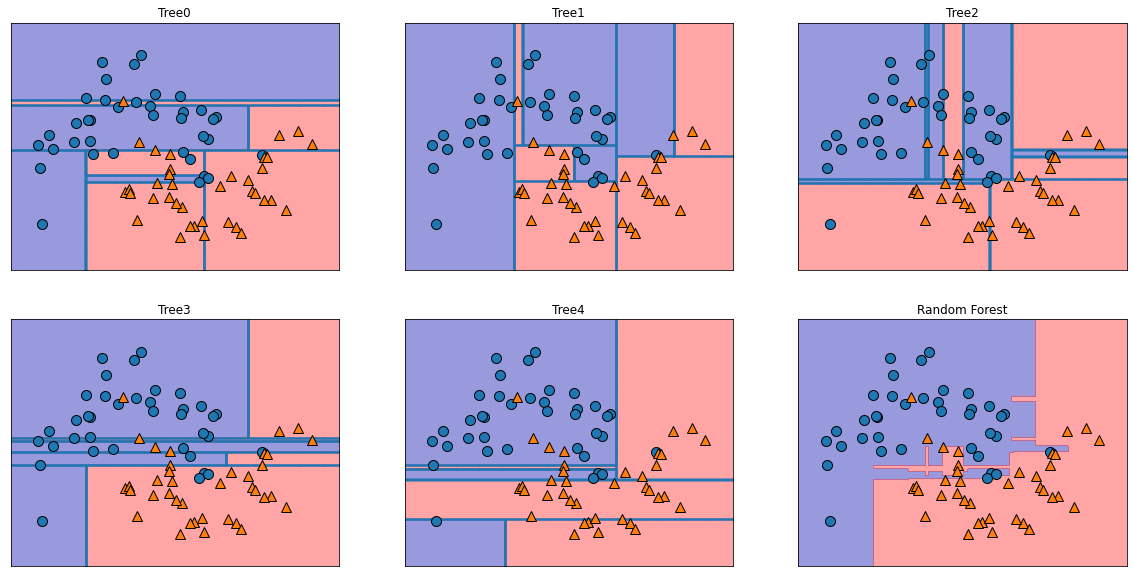

In [77]:
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                               alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()


In [78]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on training set: 0.972


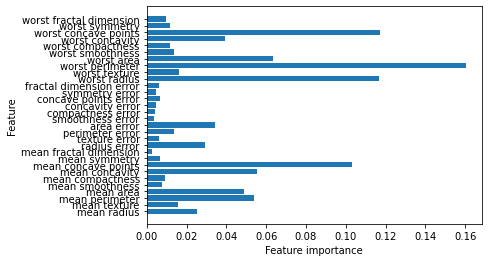

In [79]:
plot_feature_importances_cancer(forest)

**Strengths, weaknesses, and parameters.** Random forests for regression and classifica‐
tion are currently among the most widely used machine learning methods. They are
very powerful, often work well without heavy tuning of the parameters, and don’t
require scaling of the data.
Random forests don’t tend to perform well on very high dimensional, sparse data,
such as text data. For this kind of data, linear models might be more appropriate.
* Random forests usually work well even on very large datasets, and training can easily
be parallelized over many CPU cores within a powerful computer. However, random
forests require more memory and are slower to train and to predict than linear mod‐
els. If time and memory are important in an application, it might make sense to use a
linear model instead.

**Gradient boosted regression trees (gradient boosting machines)** 
The gradient boosted regression tree is another ensemble method that combines mul‐
tiple decision trees to create a more powerful model. Despite the “regression” in the
name, these models can be used for regression and classification. In contrast to the
random forest approach, gradient boosting works by building trees in a serial man‐
ner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used. Gradient boosted trees often use very shallow trees, of depth one to five,
which makes the model smaller in terms of memory and makes predictions faster.
* Apart from the pre-pruning and the number of trees in the ensemble, another impor‐
tant parameter of gradient boosting is the learning_rate, which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex mod‐
els. Adding more trees to the ensemble, which can be accomplished by increasing
n_estimators, also increases the model complexity, as the model has more chances
to correct mistakes on the training set

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_test, y_test)))



Accuracy on training set: 1.000
Accuracy on training set: 0.965


* As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐
ting, we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [81]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.991
Accuracy on training set: 0.972


In [82]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on training set: 0.965


* In this case, lowering the maximum depth of the trees provided a signifi‐
cant improvement of the model, while lowering the learning rate only increased the
generalization performance slightly.

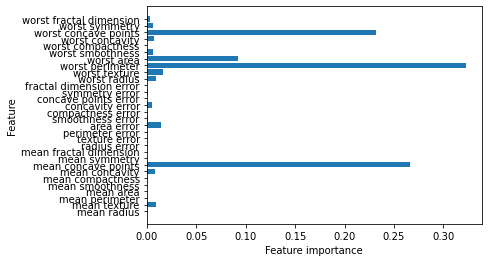

In [83]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

* We can see that the feature importances of the gradient boosted trees are somewhat
similar to the feature importances of the random forests, though the gradient boost‐
ing completely ignored some of the features
* If you want to apply gradient boosting to a large-scale problem, it might be worth
looking into the xgboost package and its Python interface, which at the time of writ‐
ing is faster (and sometimes easier to tune) than the scikit-learn implementation of
gradient boosting on many datasets.

**Strengths, weaknesses, and parameters** Gradient boosted decision trees are among the
most powerful and widely used models for supervised learning. Their main drawback
is that they require careful tuning of the parameters and may take a long time to
train. Similarly to other tree-based models, the algorithm works well without scaling
and on a mixture of binary and continuous features. As with other tree-based models,
it also often does not work well on high-dimensional sparse data.

## Kernelized Support Vector Machines
Kernelized support vector machines
(often just referred to as SVMs) are an extension that allows for more complex mod‐
els that are not defined simply by hyperplanes in the input space. 

Text(0, 0.5, 'Feature 1')

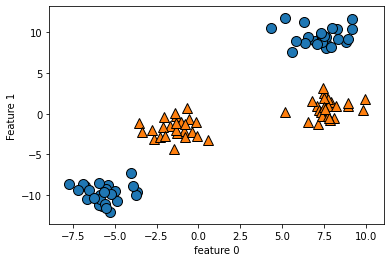

In [84]:
X, y = make_blobs(centers=4, random_state=8)
y = y%2
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("Feature 1")

C:\Users\ebube\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

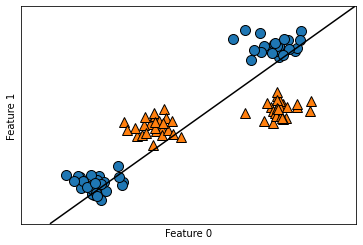

In [85]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\ebube\AppData\Local\Temp\ipykernel_5160\2918633123.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

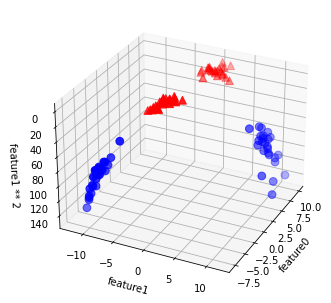

In [86]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\ebube\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ebube\AppData\Local\Temp\ipykernel_5160\3495188939.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature0 ** 2')

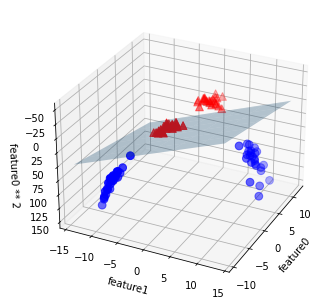

In [87]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")


Text(0, 0.5, 'Feature 1')

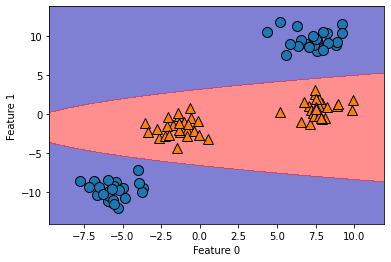

In [88]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### The kernel trick
*  there is
a clever mathematical trick that allows us to learn a classifier in a higher-dimensional
space without actually computing the new, possibly very large representation. This is
known as the kernel trick, and it works by directly computing the distance (more pre‐
cisely, the scalar products) of the data points for the expanded feature representation,
without ever actually computing the expansion.

### Understanding SVMs
* During training, the SVM learns how important each of the training data points is to
represent the decision boundary between the two classes. Typically only a subset of
the training points matter for defining the decision boundary: the ones that lie on the
border between the classes. 
* To make a prediction for a new point, the distance to each of the support vectors is
measured. A classification decision is made based on the distances to the support vec‐
tor, and the importance of the support vectors that was learned during training
(stored in the dual_coef_ attribute of SVC).
* The distance between data points is measured by the Gaussian kernel:
    

Text(0, 0.5, 'Feature 1')

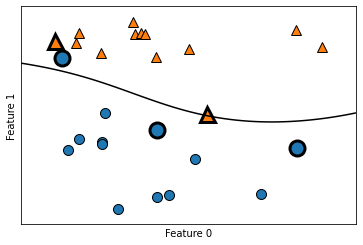

In [89]:
from sklearn.svm import SVC
X,y =mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

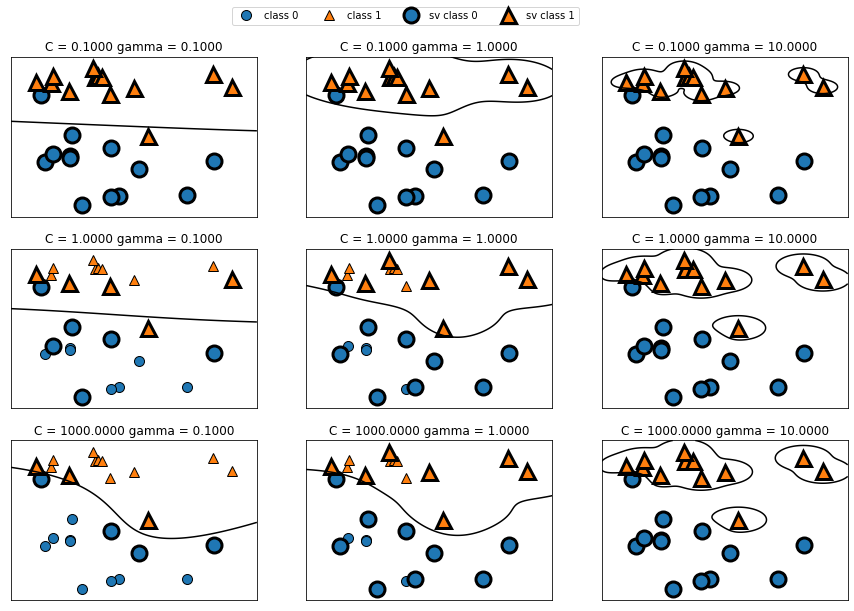

In [90]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
 ncol=4, loc=(.9, 1.2))


Going from left to right, we increase the value of the parameter gamma from 0.1 to 10.
A small gamma means a large radius for the Gaussian kernel, which means that many
points are considered close by. This is reflected in very smooth decision boundaries
on the left, and boundaries that focus more on single points further to the right. A
low value of gamma means that the decision boundary will vary slowly, which yields a
model of low complexity, while a high value of gamma yields a more complex model.
Going from top to bottom, we increase the C parameter from 0.1 to 1000. As with the
linear models, a small C means a very restricted model, where each data point can
only have very limited influence. You can see that at the top left the decision bound‐
ary looks nearly linear, with the misclassified points barely having any influence on
the line. Increasing C, as shown on the bottom right, allows these points to have a
stronger influence on the model and makes the decision boundary bend to correctly
classify them.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc =SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


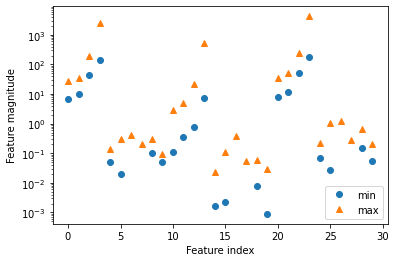

In [92]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")


In [93]:
min_on_training = X_train.min(axis=0)
range_on_training =(X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n{}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [94]:
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


### Strengths, weaknesses, and parameters
*  Kernelized support vector machines are powerful models and perform well on a vari‐
ety of datasets. SVMs allow for complex decision boundaries, even if the data has only
a few features. They work well on low-dimensional and high-dimensional data (i.e.,
few and many features), but don’t scale very well with the number of samples. Run‐
ning an SVM on data with up to 10,000 samples might work well, but working with
datasets of size 100,000 or more can become challenging in terms of runtime and
memory usage.
* Another downside of SVMs is that they require careful preprocessing of the data and
tuning of the parameters. This is why, these days, most people instead use tree-based
models such as random forests or gradient boosting (which require little or no pre‐
processing) in many applications. Furthermore, SVM models are hard to inspect; it
can be difficult to understand why a particular prediction was made, and it might be
tricky to explain the model to a nonexpert. 

## Neural Networks (Deep Learning)
* namely multilayer perceptrons for classification and regression, that can serve as a starting
point for more involved deep learning methods. Multilayer perceptrons (MLPs) are
also known as (vanilla) feed-forward neural networks, or sometimes just neural
networks.
* ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b


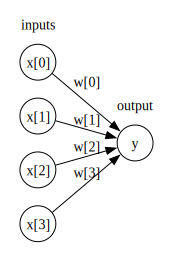

In [95]:
display(mglearn.plots.plot_logistic_regression_graph())

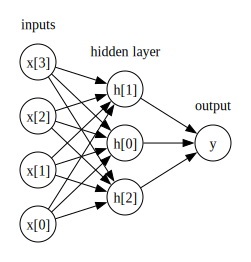

In [96]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

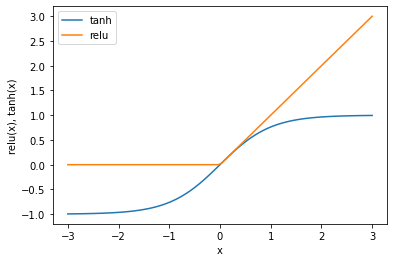

In [97]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

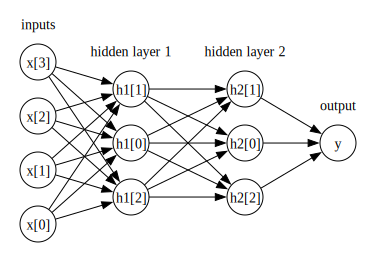

In [98]:
mglearn.plots.plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

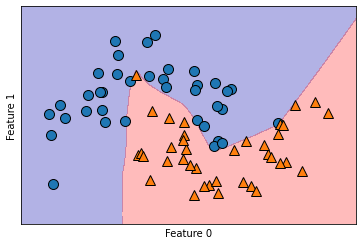

In [99]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import mglearn

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Define and train MLPClassifier
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

# Plot decision boundary
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

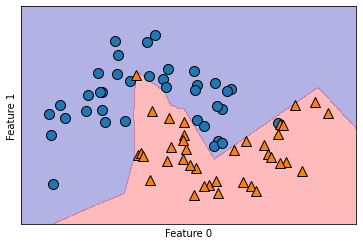

In [100]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
 hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

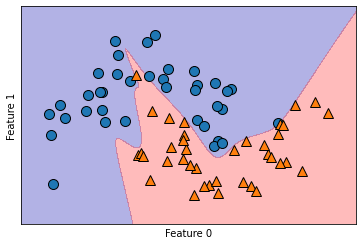

In [101]:

# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
 random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

C:\Users\ebube\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\ebube\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


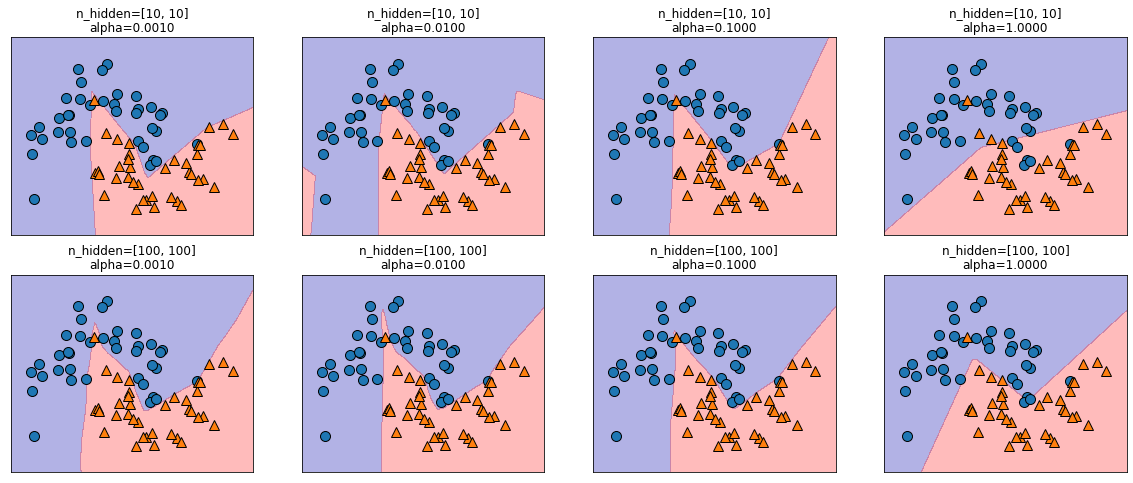

In [102]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.001, 0.01, 0.1, 1]):
        mlp=MLPClassifier(solver='lbfgs', random_state=0,
                         hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes],
                         alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))


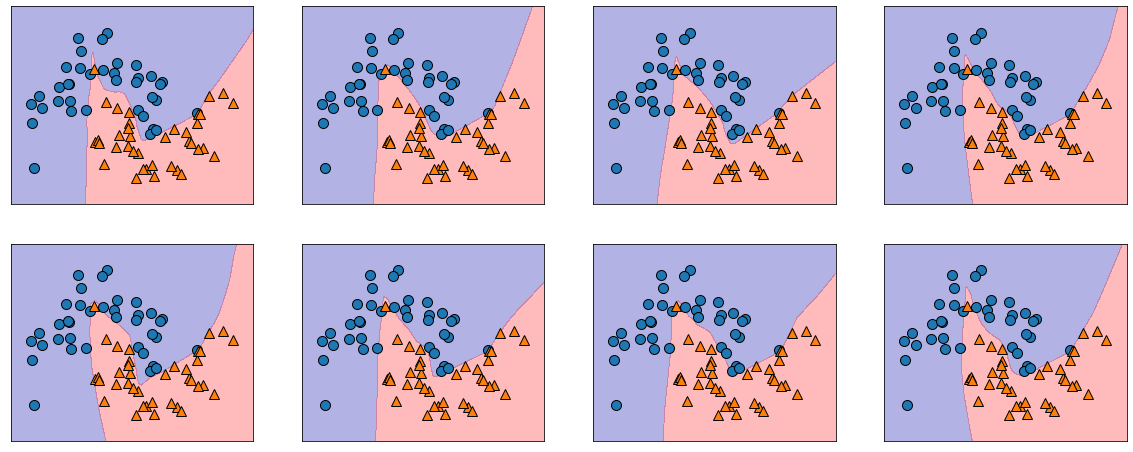

In [103]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [104]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))


Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [105]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))


Accuracy on training set: 0.94
Accuracy on test set: 0.92


* The accuracy of the MLP is quite good, but not as good as the other models. As in the
earlier SVC example, this is likely due to scaling of the data. Neural networks also
expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1.


In [106]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\Users\ebube\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


* The results are much better after scaling, and already quite competitive. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached.

In [107]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


* Increasing the number of iterations only increased the training set performance, not
the generalization performance. Still, the model is performing quite well. As there is
some gap between the training and the test performance, we might try to decrease the
model’s complexity to get better generalization performance. 

In [108]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


* While it is possible to analyze what a neural network has learned, this is usually much
trickier than analyzing a linear model or a tree-based model. One way to introspect
what was learned is to look at the weights in the model. You can see an example of
this in the scikit-learn example gallery. For the Breast Cancer dataset, this might
be a bit hard to understand. The following plot (Figure 2-54) shows the weights that
were learned connecting the input to the first hidden layer. The rows in this plot cor‐
respond to the 30 input features, while the columns correspond to the 100 hidden
units. Light colors represent large positive values, while dark colors represent nega‐
tive values:

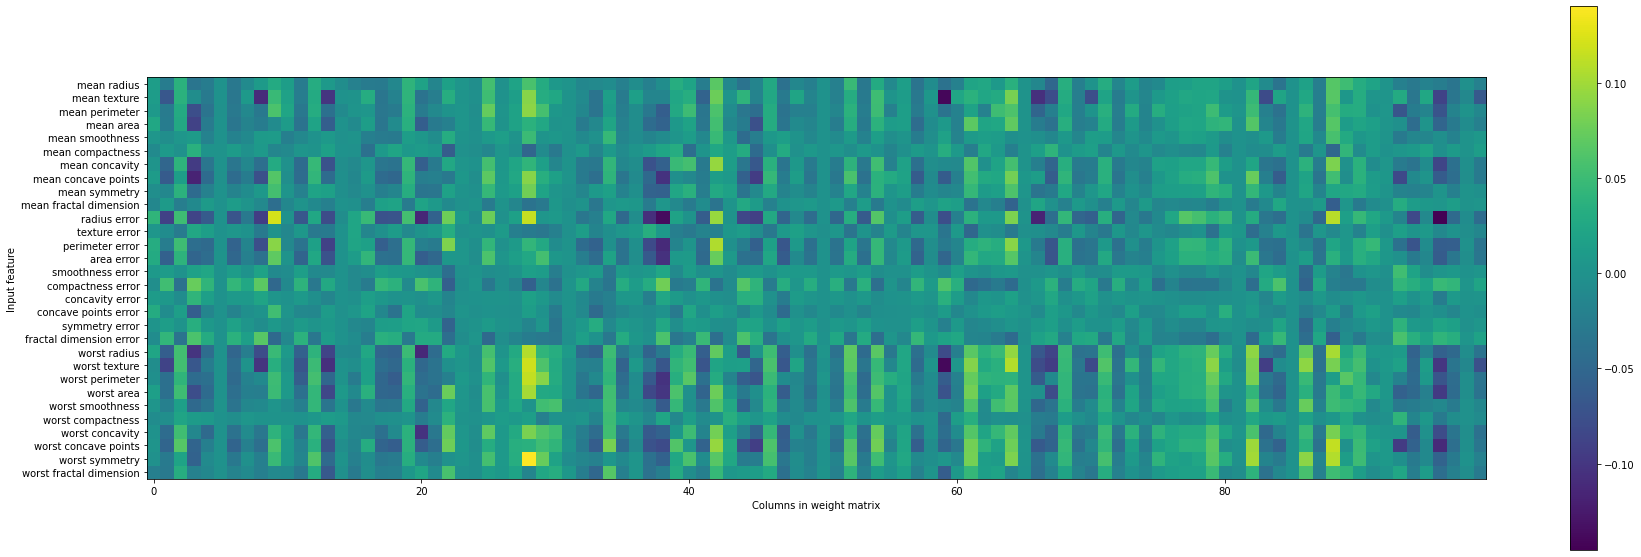

In [109]:
plt.figure(figsize=(30, 10))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()


### Strengths, weaknesses, and parameters
Neural networks have reemerged as state-of-the-art models in many applications of
machine learning. One of their main advantages is that they are able to capture infor‐
mation contained in large amounts of data and build incredibly complex models.
Given enough computation time, data, and careful tuning of the parameters, neural
networks often beat other machine learning algorithms (for classification and regres‐
sion tasks).
This brings us to the downsides. Neural networks—particularly the large and power‐
ful ones—often take a long time to train. They also require careful preprocessing of
the data, as we saw here. Similarly to SVMs, they work best with “homogeneous”
data, where all the features have similar meanings. For data that has very different
kinds of features, tree-based models might work better. Tuning neural network
parameters is also an art unto itself. In our experiments, we barely scratched the sur‐
face of possible ways to adjust neural network models and how to train them.


## Uncertainty Estimates from Classifiers
 * Often, you are
not only interested in which class a classifier predicts for a certain test point, but also
how certain it is that this is the right class. In practice, different kinds of mistakes lead
to very different outcomes in real-world applications.
  * There are two different functions in scikit-learn that can be used to obtain uncer‐
tainty estimates from classifiers: decision_function and predict_proba. Most (but
not all) classifiers have at least one of them, and many classifiers have both. 

In [110]:
# import useful libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
# define funciton or define X, y with use make_circles
X, y = make_circles( noise=0.2, factor=0.5,random_state=1)
# we must rename of y function
y_named = np.array(["blue","red"])[y]
# all divisors will be split a consistent manner
X_train, X_test, y_train_named, y_test_named = train_test_split(X,y_named, random_state=0)

# We can build clf with use Gradient model
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train_named)

In [111]:
#clf.score(X_test, y_test)

### The Decision Function
* In the binary classification case, the return value of decision_function is of shape
(n_samples,), and it returns one floating-point number for each sample

In [112]:
print(f"X_test.shape: {X_test.shape}")
print(f"Decision function shape: {clf.decision_function(X_test).shape}")

X_test.shape: (25, 2)
Decision function shape: (25,)


* This value encodes how strongly the model believes a data point to belong to the
“positive” class, in this case class 1. Positive values indicate a preference for the posi‐
tive class, and negative values indicate a preference for the “negative” (other) class

In [113]:
print(f"seventh value of decision_function:{clf.decision_function(X_test)[:7]}")

seventh value of decision_function:[ 3.86233255  1.8624287  -4.42728479 -3.89794922  4.71924839  4.33562417
 -7.63093337]


In [114]:
print("Thresholded decision function:\n{}".format(
clf.decision_function(X_test) > 0))
print("Predictions:\n{}".format(clf.predict(X_test)))

Thresholded decision function:
[ True  True False False  True  True False  True  True  True False  True
  True False  True False  True False  True  True  True False False False
 False]
Predictions:
['red' 'red' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'blue' 'blue' 'blue']


* For binary classification, the “negative” class is always the first entry of the classes_
attribute, and the “positive” class is the second entry of classes_. So if you want to
fully recover the output of predict, you need to make use of the classes_ attribute:

In [115]:
greater_zero = (clf.decision_function(X_test)>0).astype(int)
#use 0 and 1 as indices into classes_
pred = clf.classes_[greater_zero]
#pred the same as the output of clf.predict
print(f"pred is equalto predictions:{np.all(pred==clf.predict(X_test))}")

pred is equalto predictions:True


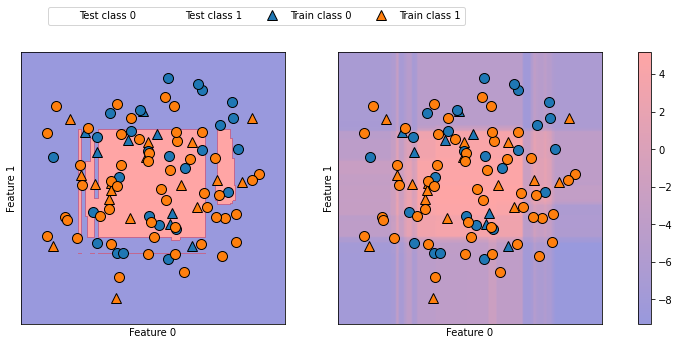

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(clf, X, ax=axes[0], alpha=.4,
                                 fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(clf, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # plot training and test points
    mask_test = np.arange(len(X_test))  # Generate boolean index array for test data
    mglearn.discrete_scatter(X_test[mask_test, 0], X_test[mask_test, 1], y_test[mask_test],
                             markers='^', ax=ax)
    
    mask_train = np.arange(len(X_train))  # Generate boolean index array for train data
    mglearn.discrete_scatter(X_train[mask_train, 0], X_train[mask_train, 1], y_train[mask_train],
                             markers='o', ax=ax)
    
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))


### Predicting Probabilities
The output of predict_proba is a probability for each class, and is often more easily
understood than the output of decision_function.

In [117]:
print(f"Predicted probabilties:{clf.predict_proba(X_test[:6])}")

Predicted probabilties:[[0.02058621 0.97941379]
 [0.13442022 0.86557978]
 [0.98819416 0.01180584]
 [0.98011977 0.01988023]
 [0.00884299 0.99115701]
 [0.01292447 0.98707553]]


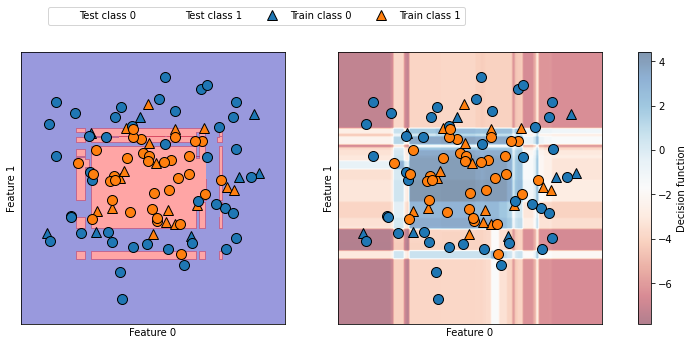

In [119]:
import matplotlib.pyplot as plt
import mglearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and train Gradient Boosting classifier
gbrt = GradientBoostingClassifier(random_state=42)
gbrt.fit(X_train, y_train)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Plot decision boundaries
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True)
# Plot training and test points
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=axes[0])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=axes[0])
axes[0].set_xlabel("Feature 0")
axes[0].set_ylabel("Feature 1")
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

# Plot decision scores
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm='RdBu')
# Plot training and test points
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=axes[1])
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=axes[1])
axes[1].set_xlabel("Feature 0")
axes[1].set_ylabel("Feature 1")

# Add colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_label("Decision function")
plt.show()


### Uncertainty in Multiclass Classification
* decision_function and predict_proba methods also work in the multiclass setting.

In [121]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42) 
clf = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [123]:
print("Decision function shape: {}".format(clf.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(clf.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.995715    0.04758267 -1.92720695]
 [ 0.06146394 -1.90755736 -1.92793758]
 [-1.99058203 -1.87637861  0.09686725]
 [-1.995715    0.04758267 -1.92720695]
 [-1.99730159 -0.13469108 -1.20341483]
 [ 0.06146394 -1.90755736 -1.92793758]]


In [125]:
print("Argmax of decision function:\n{}".format(
np.argmax(clf.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(clf.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [126]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(clf.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(clf.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217718 0.78840034 0.10942248]
 [0.78347147 0.10936745 0.10716108]
 [0.09818072 0.11005864 0.79176065]
 [0.10217718 0.78840034 0.10942248]
 [0.10360005 0.66723901 0.22916094]
 [0.78347147 0.10936745 0.10716108]]
Sums: [1. 1. 1. 1. 1. 1.]


In [128]:
print("Argmax of predicted probabilities:\n{}".format(
np.argmax(clf.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(clf.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [129]:
logreg = LogisticRegression()
# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
    logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


## Summary and Outlook
* quick summary of when to use each model:
    
    *Nearest neighbors
        For small datasets, good as a baseline, easy to explain.
    *Linear models
        Go-to as a first algorithm to try, good for very large datasets, good for very high-
        dimensional data.
    *Naive Bayes
        Only for classification. Even faster than linear models, good for very large data‐
        sets and high-dimensional data. Often less accurate than linear models.
    *Decision trees
        Very fast, don’t need scaling of the data, can be visualized and easily explained.
    *Random forests
        Nearly always perform better than a single decision tree, very robust and power‐
        ful. Don’t need scaling of data. Not good for very high-dimensional sparse data.
    *Gradient boosted decision trees
        Often slightly more accurate than random forests. Slower to train but faster to
        predict than random forests, and smaller in memory. Need more parameter tun‐
        ing than random forests.
    *Support vector machines
        Powerful for medium-sized datasets of features with similar meaning. Require
        scaling of data, sensitive to parameters.
    *Neural networks
        Can build very complex models, particularly for large datasets. Sensitive to scal‐
        ing of the data and to the choice of parameters. Large models need a long time to
        train.

* When working with a new dataset, it is in general a good idea to start with a simple
model, such as a linear model or a naive Bayes or nearest neighbors classifier, and see
how far you can get. After understanding more about the data, you can consider
moving to an algorithm that can build more complex models, such as random forests,
gradient boosted decision trees, SVMs, or neural networks.
You should now be in a position where you have some idea of how to apply, tune, and
analyze the models we discussed here.